## Import Data and Settings

In [1]:
#import all the libraries needed
from imports import *
# import my functions
from function_store import *

#---------------------------------SETUP Plotting---------------------------------#
# Set global line width
plt.rcParams['lines.linewidth'] = 3  # Change this to your desired line width
# Set global font size for labels on matplotlib plots
plt.rcParams['axes.labelsize'] = 15  # Change this to your desired font size
plt.rcParams['xtick.labelsize'] = 15  # Change this to your desired font size
plt.rcParams['ytick.labelsize'] = 15  # Change this to your desired font size

#---------------------------------Import Data---------------------------------#
# Define the path out to the output directory where data is saved
path_out =  ('/Users/horatiocox/Library/CloudStorage/OneDrive-UniversityCollegeLondon/A-PostDoc/Presentations/CIMTEC/VNA/')

# Define the path in to the directories containing the VNA data
directory_1 = ('/Users/horatiocox/Desktop/VNA_Analysis/mag_angle_260424/')
directory_3 = ('/Users/horatiocox/Desktop/VNA_Analysis/CPW_mem_oscillator_220524/Oscillator/')
directory_2 = ('/Users/horatiocox/Desktop/VNA_Analysis/CPW_mem_oscillator_220524/Memristor/')

# Import the data from the VNA files
s2p_files_1 = import_data(directory_1)
s2p_files_2 = import_data(directory_2)
s2p_files_3 = import_data(directory_3)
# Remove duplicate frequency points from all the thru data to prevent errors with skrf functions
s2p_files_1 = duplicate_check(s2p_files_1)
s2p_files_2 = duplicate_check(s2p_files_2)
s2p_files_3 = duplicate_check(s2p_files_3)

# Separate the simulation data so no filtering is applied
s2p_files_2_sim = s2p_files_2[-1]
s2p_files_2 = s2p_files_2[:-1]

/Users/horatiocox/Desktop/VNA_Analysis/VNAenv/lib/python3.9/site-packages/skrf/frequency.py:273: InvalidFrequencyWarning: Frequency values are not monotonously increasing!
To get rid of the invalid values call `drop_non_monotonic_increasing`
  temp_freq.check_monotonic_increasing()


1 run1_r0c0_thru Wafer0_r0_c0_ISS_thru_LRM+_1.S2P
2 run2_rNonecNone_thru ISS_thru_LRRM_1.S2P
3 run3_r10c1_thru Wafer2_r10_c1_thru_1.S2P
4 run4_r10c13_thrunotaper Wafer2_r10_c13_thrunotaper_1.S2P
5 run5_r10c5_open Wafer2_r10_c5_open_1.S2P
6 run6_r10c9_opensig Wafer2_r10_c9_opensig_1.S2P
7 run7_r10c11_short Wafer2_r10_c11_short_1.S2P
8 run8_r1c2_pristine Wafer2_r1_c2_pristine_1.S2P
9 run9_r1c2_pristine Wafer2_r1_c2_pristine 2_1.S2P
10 run10_r1c3_pristine Wafer2_r1_c3_pristine_1.S2P
11 run11_r1c4_pristine Wafer2_r1_c4_pristine_1.S2P
12 run12_r1c5_pristine Wafer2_r1_c5_pristine_1.S2P
13 run13_r1c6_pristine Wafer2_r1_c6_pristine_1.S2P
14 run14_r1c7_pristine Wafer2_r1_c7_pristine_1.S2P
15 run15_r1c7_pristine Wafer2_r1_c7_pristine 2_1.S2P
16 run16_r1c8_pristine Wafer2_r1_c8_pristine_1.S2P
17 run17_r1c9_pristine Wafer2_r1_c9_pristine_1.S2P
18 run18_rNonecNone_thru ISS_thru_LRM+_log_1.S2P
19 run19_r1c2_pristine Wafer2_r1_c2_pristine_log_1.S2P
20 run20_r1c3_pristine Wafer2_r1_c3_pristine_log_1.S

### De-embedding the data

open_short_thru 4 2 4
[29493.25017913594, 29493.828865204905, 29493.097293820058, 29492.936062208333, 29489.754914854297, 29493.548249662417, 29489.8297148353, 29490.92647900279]
Best OS de-embedding protocol: dm[4] = 29489.754914854297, worst:dm[1] = 29493.828865204905


/Users/horatiocox/Desktop/VNA_Analysis/VNAenv/lib/python3.9/site-packages/skrf/calibration/deembedding.py:1069: RuntimeWarning: Non-uniform frequency vector detected. An interpolated S-parameter matrix will be created for
                   this calculation. The output results will be re-interpolated to the original vector.
  self.s_side1, self.s_side2 = self.split2xthru(self.s2xthru)


[22093.334805985014, 22166.101440143848, 22111.505466789735, 22149.911859675216]
Best TX de-embedding protocol: dm[0] = 22093.334805985014, worst:dm[1] = 22166.101440143848
[22142.759252420034, 22173.026633369736, 22170.162258333825, 22176.1630962921]
Best ABCD de-embedding protocol: dm[0] = 22142.759252420034, worst:dm[3] = 22176.1630962921


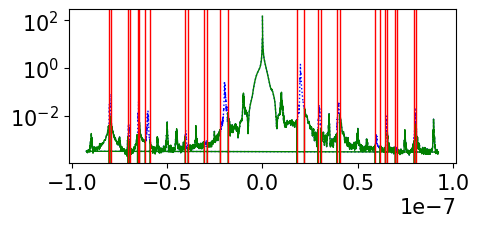

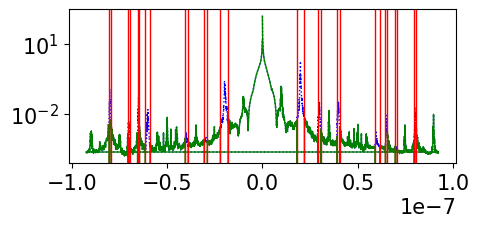

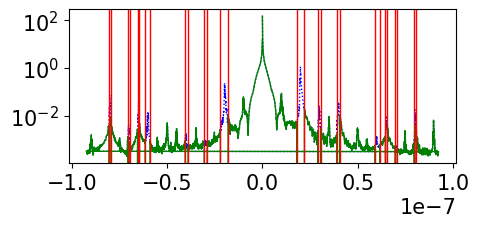

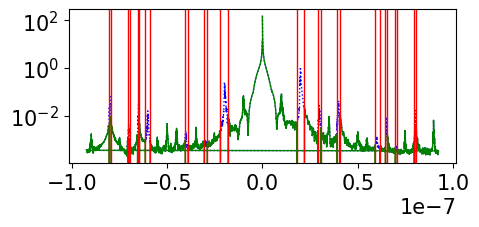

In [2]:
#-------------------Grouping-------------------
# Select the On Wafer Calibration files to be used
ISS_thru = [s for s in s2p_files_2 if s.state == 'thru' and s.wafer_number == 0]
cal_thru = [s for s in s2p_files_2 if s.state == 'thru' and s.wafer_number != 0] #[s2p_files_2[22],s2p_files_2[23]]#
cal_open = [s for s in s2p_files_2 if s.state == 'open' or s.state == 'opensig']
cal_short = [s for s in s2p_files_2 if s.state == 'short']
print('open_short_thru',len(cal_open),len(cal_short),len(cal_thru))

#-------------------De-Embedding-------------------
# Get the de-embedding objects
OS = calibration_OS(cal_open, cal_short, cal_thru, plot_cal = False) #Open Short De-embedding
TX = calibration_2x(cal_thru, plot_cal = False) #2x through De-embedding

# Go through and de-embed all data
sp2_files_2_OS = copy.deepcopy(s2p_files_2)
sp2_files_2_TX = copy.deepcopy(s2p_files_2)

for f in sp2_files_2_OS:
    f.network = OS.deembed(f.network)
for f in sp2_files_2_TX:
    f.network = TX.deembed(f.network)

# My ABCD cascade based de-embedding - doesn't use SKRF so kept separate as uses a different data structure
ABCD = calibration_ABCD(cal_thru, plot_cal = False) # Generate the de-embedding matrix
s2p_files_2_ABCD = deembed_ABCD(copy.deepcopy(s2p_files_2), ABCD) # Apply the de-embedding matrix

#-------------------FFT Filtering-------------------
plt.rcParams['lines.linewidth'] = 1  # Change this to your desired line width
# Select bandstop frequency components
threshold_values = [[1.8e-8,2.2e-8],[5.9e-8,6.15e-8],[3.9e-8,4.05e-8],[2.9e-8,3.05e-8],[7.95e-8,8.05e-8],[6.45e-8,6.55e-8],[6.96e-8,7.06e-8]]

# Apply the FFT to the raw data (to dupilcated data to avoid overwriting), filter out components then IFFT
sp2_files_2_FFT = fourier_filter(copy.deepcopy(s2p_files_2), threshold = threshold_values,t_window = 0.02)   

# Apply the FFT to the de-embedded data (to dupilcated data to avoid overwriting), filter out components then IFFT
sp2_files_2_OS_FFT = fourier_filter(copy.deepcopy(sp2_files_2_OS), threshold = threshold_values,t_window = 0.02)  
s2p_files_2_TX_FFT = fourier_filter(copy.deepcopy(sp2_files_2_TX), threshold = threshold_values,t_window = 0.02)
s2p_files_2_ABCD_FFT = fourier_filter(copy.deepcopy(s2p_files_2_ABCD), threshold = threshold_values,t_window = 0.02)   



## GIF generation

In [17]:
res_list = [1.8e9,2e7,1.6e6,1.04e5,3.37e8,1.7e7,1.35e5,1.8e4,1.26e4,1.97e4,3.19e4,1.7e2,1.92e3,4.09e2,3.86e2]
r_in = [23,42,56,60,64,67,57,58,59,61,62,63,65,66,68]
p_4 = subgen(s2p_files_2_ABCD_FFT, r_num)

counter = 0
for i in r_in:
    # Adjust index to be zero-based
    index = i - 1
    # Print the filename and the corresponding resistance
    print(f"Filename: {s2p_files_2_ABCD_FFT[index].filename}, Resistance: {res_list[counter]}")
    counter += 1


Filename: Wafer2_r2_c1_pristine.S2P_deembeded_ABC_FFT_filtered, Resistance: 1800000000.0
Filename: Wafer2_r2_c1_formed_0dc.S2P_deembeded_ABC_FFT_filtered, Resistance: 20000000.0
Filename: Wafer2_r2_c1_reset.S2P_deembeded_ABC_FFT_filtered, Resistance: 1600000.0
Filename: Wafer2_r2_c1_reset2.S2P_deembeded_ABC_FFT_filtered, Resistance: 104000.0
Filename: Wafer2_r2_c1_reset3.S2P_deembeded_ABC_FFT_filtered, Resistance: 337000000.0
Filename: Wafer2_r2_c1_reset4.S2P_deembeded_ABC_FFT_filtered, Resistance: 17000000.0
Filename: Wafer2_r2_c1_set.S2P_deembeded_ABC_FFT_filtered, Resistance: 135000.0
Filename: Wafer2_r2_c1_set2.S2P_deembeded_ABC_FFT_filtered, Resistance: 18000.0
Filename: Wafer2_r2_c1_set3.S2P_deembeded_ABC_FFT_filtered, Resistance: 12600.0
Filename: Wafer2_r2_c1_set4.S2P_deembeded_ABC_FFT_filtered, Resistance: 19700.0
Filename: Wafer2_r2_c1_set5.S2P_deembeded_ABC_FFT_filtered, Resistance: 31900.0
Filename: Wafer2_r2_c1_set6.S2P_deembeded_ABC_FFT_filtered, Resistance: 170.0
Filenam

In [4]:
#-------------------Selecting Data-------------------
# format: s2p_files_[number]_[None/OS/Tx/ABCD]_[None/FFT]
#r_num =[[23],[62,63],[56,60]]
# res_list = [[1.8e9,2e7],[1.6e6,1.04e5,3.37e8,1.7e7],[1.35e5,1.8e4,1.26e4,1.97e4,3.19e4,1.7e2,1.92e3,4.09e2,3.86e2]]
# r_in = [[23,42],[56,60,64,67], [57,58,59,61,62,63,65,66,68]]

#DC sweep 1[23,31,30,29,28,27,26,25,24,32,33,34,35,36,37,38,39,40,41,42]
# DC sweep 2[47,46,45,44,43,48,49,50,51,52,53,54,55]

# r_loop = [23,42,56,60,64,67,57,58,59,61,62,63,65,66,68]
# res_in = [1.8e9,2e7,1.6e6,1.04e5,3.37e8,1.7e7,1.35e5,1.8e4,1.26e4,1.97e4,3.19e4,1.7e2,1.92e3,4.09e2,3.86e2]
r_loop = [47,46,45,44,43,48,49,50,51,52,53,54,55]#list(range(23,56))
res_in = [2e7]*len(r_loop)
img_objects = []  
images = [] # List to store paths of the saved images

for count, r in enumerate(r_loop):
    res_list = [[1.8e9],[res_in[count]]]
    r_num = [[23],[r]]
    p_1 = subgen(s2p_files_2, r_num)[0]
    p_2 = subgen(sp2_files_2_FFT, r_num)[0]
    p_3 = subgen(s2p_files_2_ABCD, r_num)[0]
    p_4 = subgen(s2p_files_2_ABCD_FFT, r_num)
    plot_data_1 = p_4
    plot_data_2 = [p_1,p_2,p_3,p_4]


    #-------------------Plotting-------------------
    plt.rcParams['lines.linewidth'] = 3  # Change this to your desired line width
    f = plt.figure(figsize=(20,10),dpi=200)
    gs = f.add_gridspec(1, 2)
    ax = f.add_subplot(gs[0, 0])
    ax1 = f.add_subplot(gs[0, 1])
    # ax2 = f.add_subplot(gs[1, 0])
#     ax3 = f.add_subplot(gs[1, 1])

    sub_plot(ax=ax, dev_subset=plot_data_1, plot_type=['cap'], log_x=False, m_port=[1], n_port=[2], deembed_data=False, 
         y_range = [5e-13,7.5e-13],x_range='0.2-19.8ghz',R_in=res_list)
    sub_plot(ax=ax1, dev_subset=plot_data_1, plot_type=['s_deg'], log_x=False, m_port=[1], n_port=[2], deembed_data=False, 
         x_range='0.2-19.8ghz',p_legend=False)
    #sub_plot(ax=ax2, dev_subset=plot_data_1, plot_type=['a_deg'], log_x=False, m_port=[1], n_port=[2], deembed_data=False, 
    #      y_range=[-90,-70], x_range='0.2-19.8ghz',p_legend=False)
#    sub_plot(ax=ax3, dev_subset=plot_data_1, plot_type=['power'], log_x=False, m_port=[1], n_port=[2], deembed_data=False, 
#          y_range=[3,7], x_range='0.2-19.8ghz',p_legend=False)

#     plt.savefig(os.path.join(path_out, f'normp_memstate_db_log_{r}.svg'), format='svg')
#plt.show()  

# Save each figure with a unique name
    fig_name = os.path.join(path_out, f'normp_memstate_db_log_{r}.png')
    plt.savefig(fig_name, format='png')
    images.append(fig_name)  # Add the path to the list
    plt.close()  # Close the figure to free memory

for filename in images:
    img = Image.open(filename)
    img_objects.append(img)
    os.remove(filename)  # Optionally remove the image files after adding them to the list

# Save as GIF
# The first image in the list is used as the base image to save the GIF
img_objects[0].save(os.path.join(path_out, 'memDC_sweep2lin_cap_vertical.gif'),
                    save_all=True, append_images=img_objects[1:], duration=700, loop=0)


Power in mW: 63.09573444801933


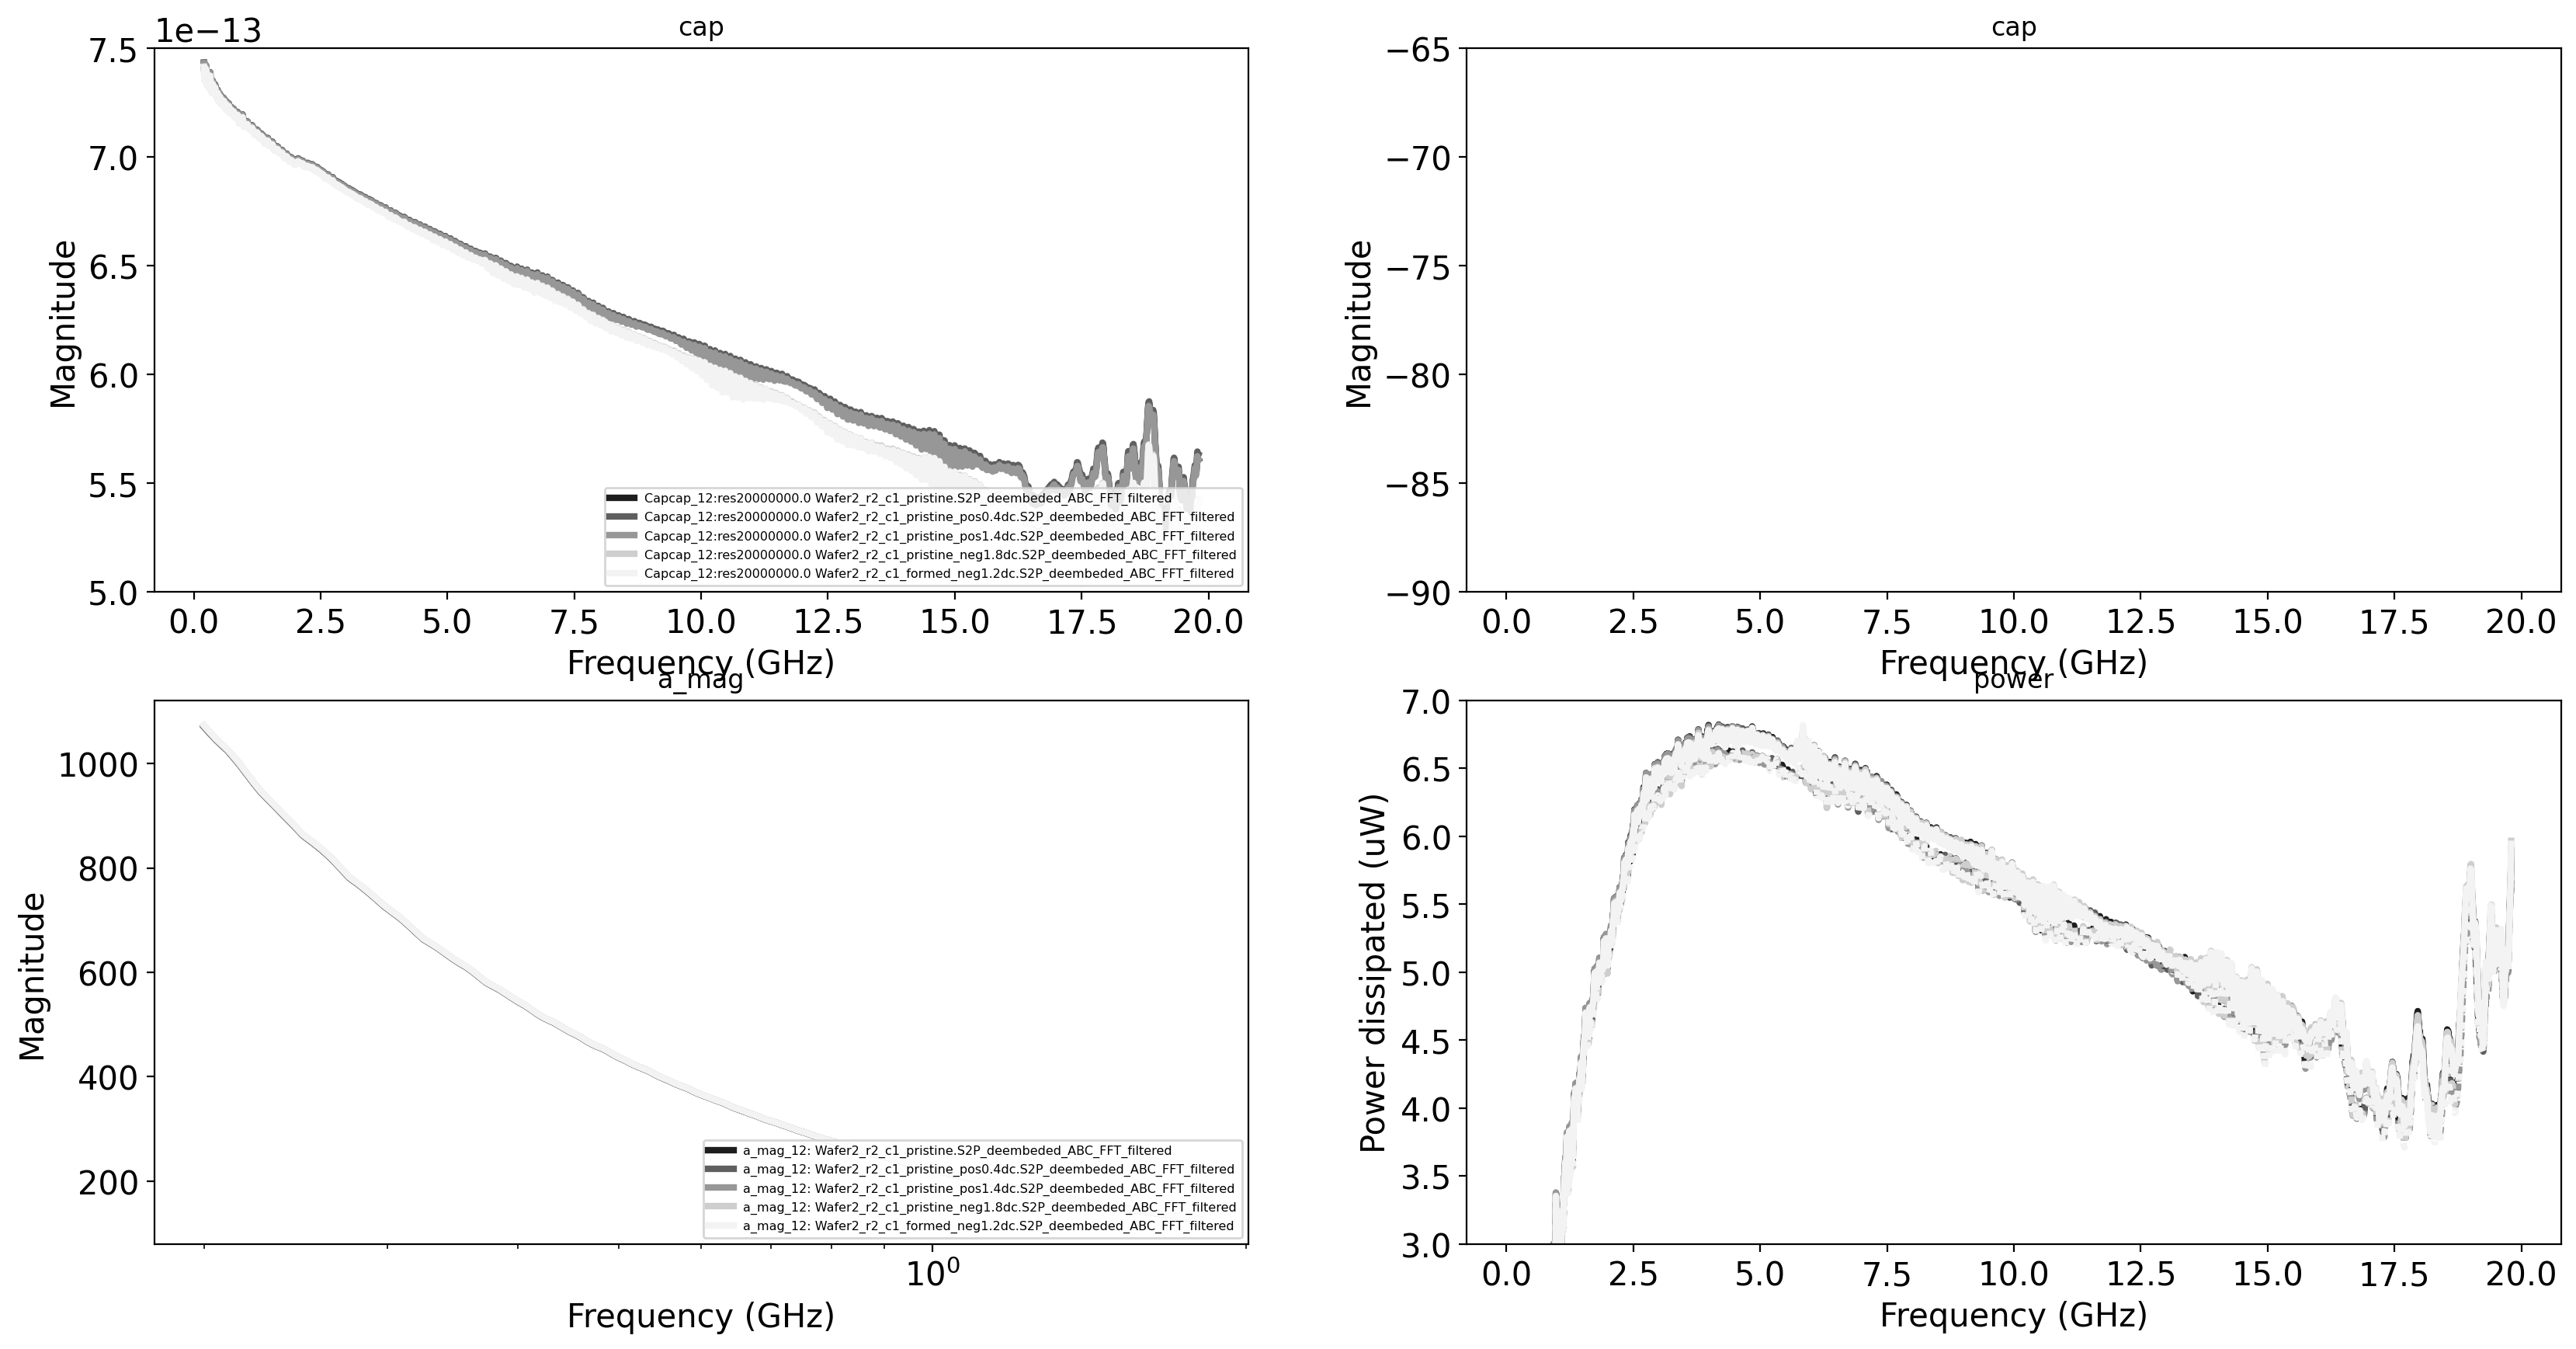

In [5]:
#-------------------Plotting-------------------
plt.rcParams['lines.linewidth'] = 3  # Change this to your desired line width
f = plt.figure(figsize=(20,10),dpi=200)
gs = f.add_gridspec(2, 2)
ax = f.add_subplot(gs[0, 0])
ax1 = f.add_subplot(gs[0, 1])
ax2 = f.add_subplot(gs[1, 0])
ax3 = f.add_subplot(gs[1, 1])

r_num = [[23,25,30,40,50]]
res_list=[[2e7,2e7,2e7,2e7,2e7]]
#res_list = [[1.8e9,2e7],[1.6e6,1.04e5,3.37e8,1.7e7],[1.35e5,1.8e4,1.26e4,1.97e4,3.19e4,1.7e2,1.92e3,4.09e2,3.86e2]]

plot_data_1 = subgen(s2p_files_2_ABCD_FFT, r_num)
sub_plot(ax=ax, dev_subset=plot_data_1, plot_type=['cap'], log_x=False, m_port=[1], n_port=[2], deembed_data=False, 
         y_range = [5e-13,7.5e-13],x_range='0.2-19.8ghz',R_in=res_list)
sub_plot(ax=ax1, dev_subset=plot_data_1, plot_type=['cap'], log_x=False, m_port=[1], n_port=[2], deembed_data=False, 
         y_range=[-90,-65], x_range='0.2-19.8ghz',p_legend=False,R_in=res_list)
sub_plot(ax=ax2, dev_subset=plot_data_1, plot_type=['a_mag'], log_x=True, m_port=[1], n_port=[2], deembed_data=False, 
         x_range='0.2-1.8ghz',p_legend=True,R_in=res_list)
sub_plot(ax=ax3, dev_subset=plot_data_1, plot_type=['power'], log_x=False, m_port=[1], n_port=[2], deembed_data=False, 
         y_range=[3,7], x_range='0.2-19.8ghz',p_legend=False,R_in=res_list)


#plt.savefig(os.path.join(path_out, 'memcop_ZDUT_abcd22.svg'), format='svg')

plt.show()

### Capacitance and Resistance

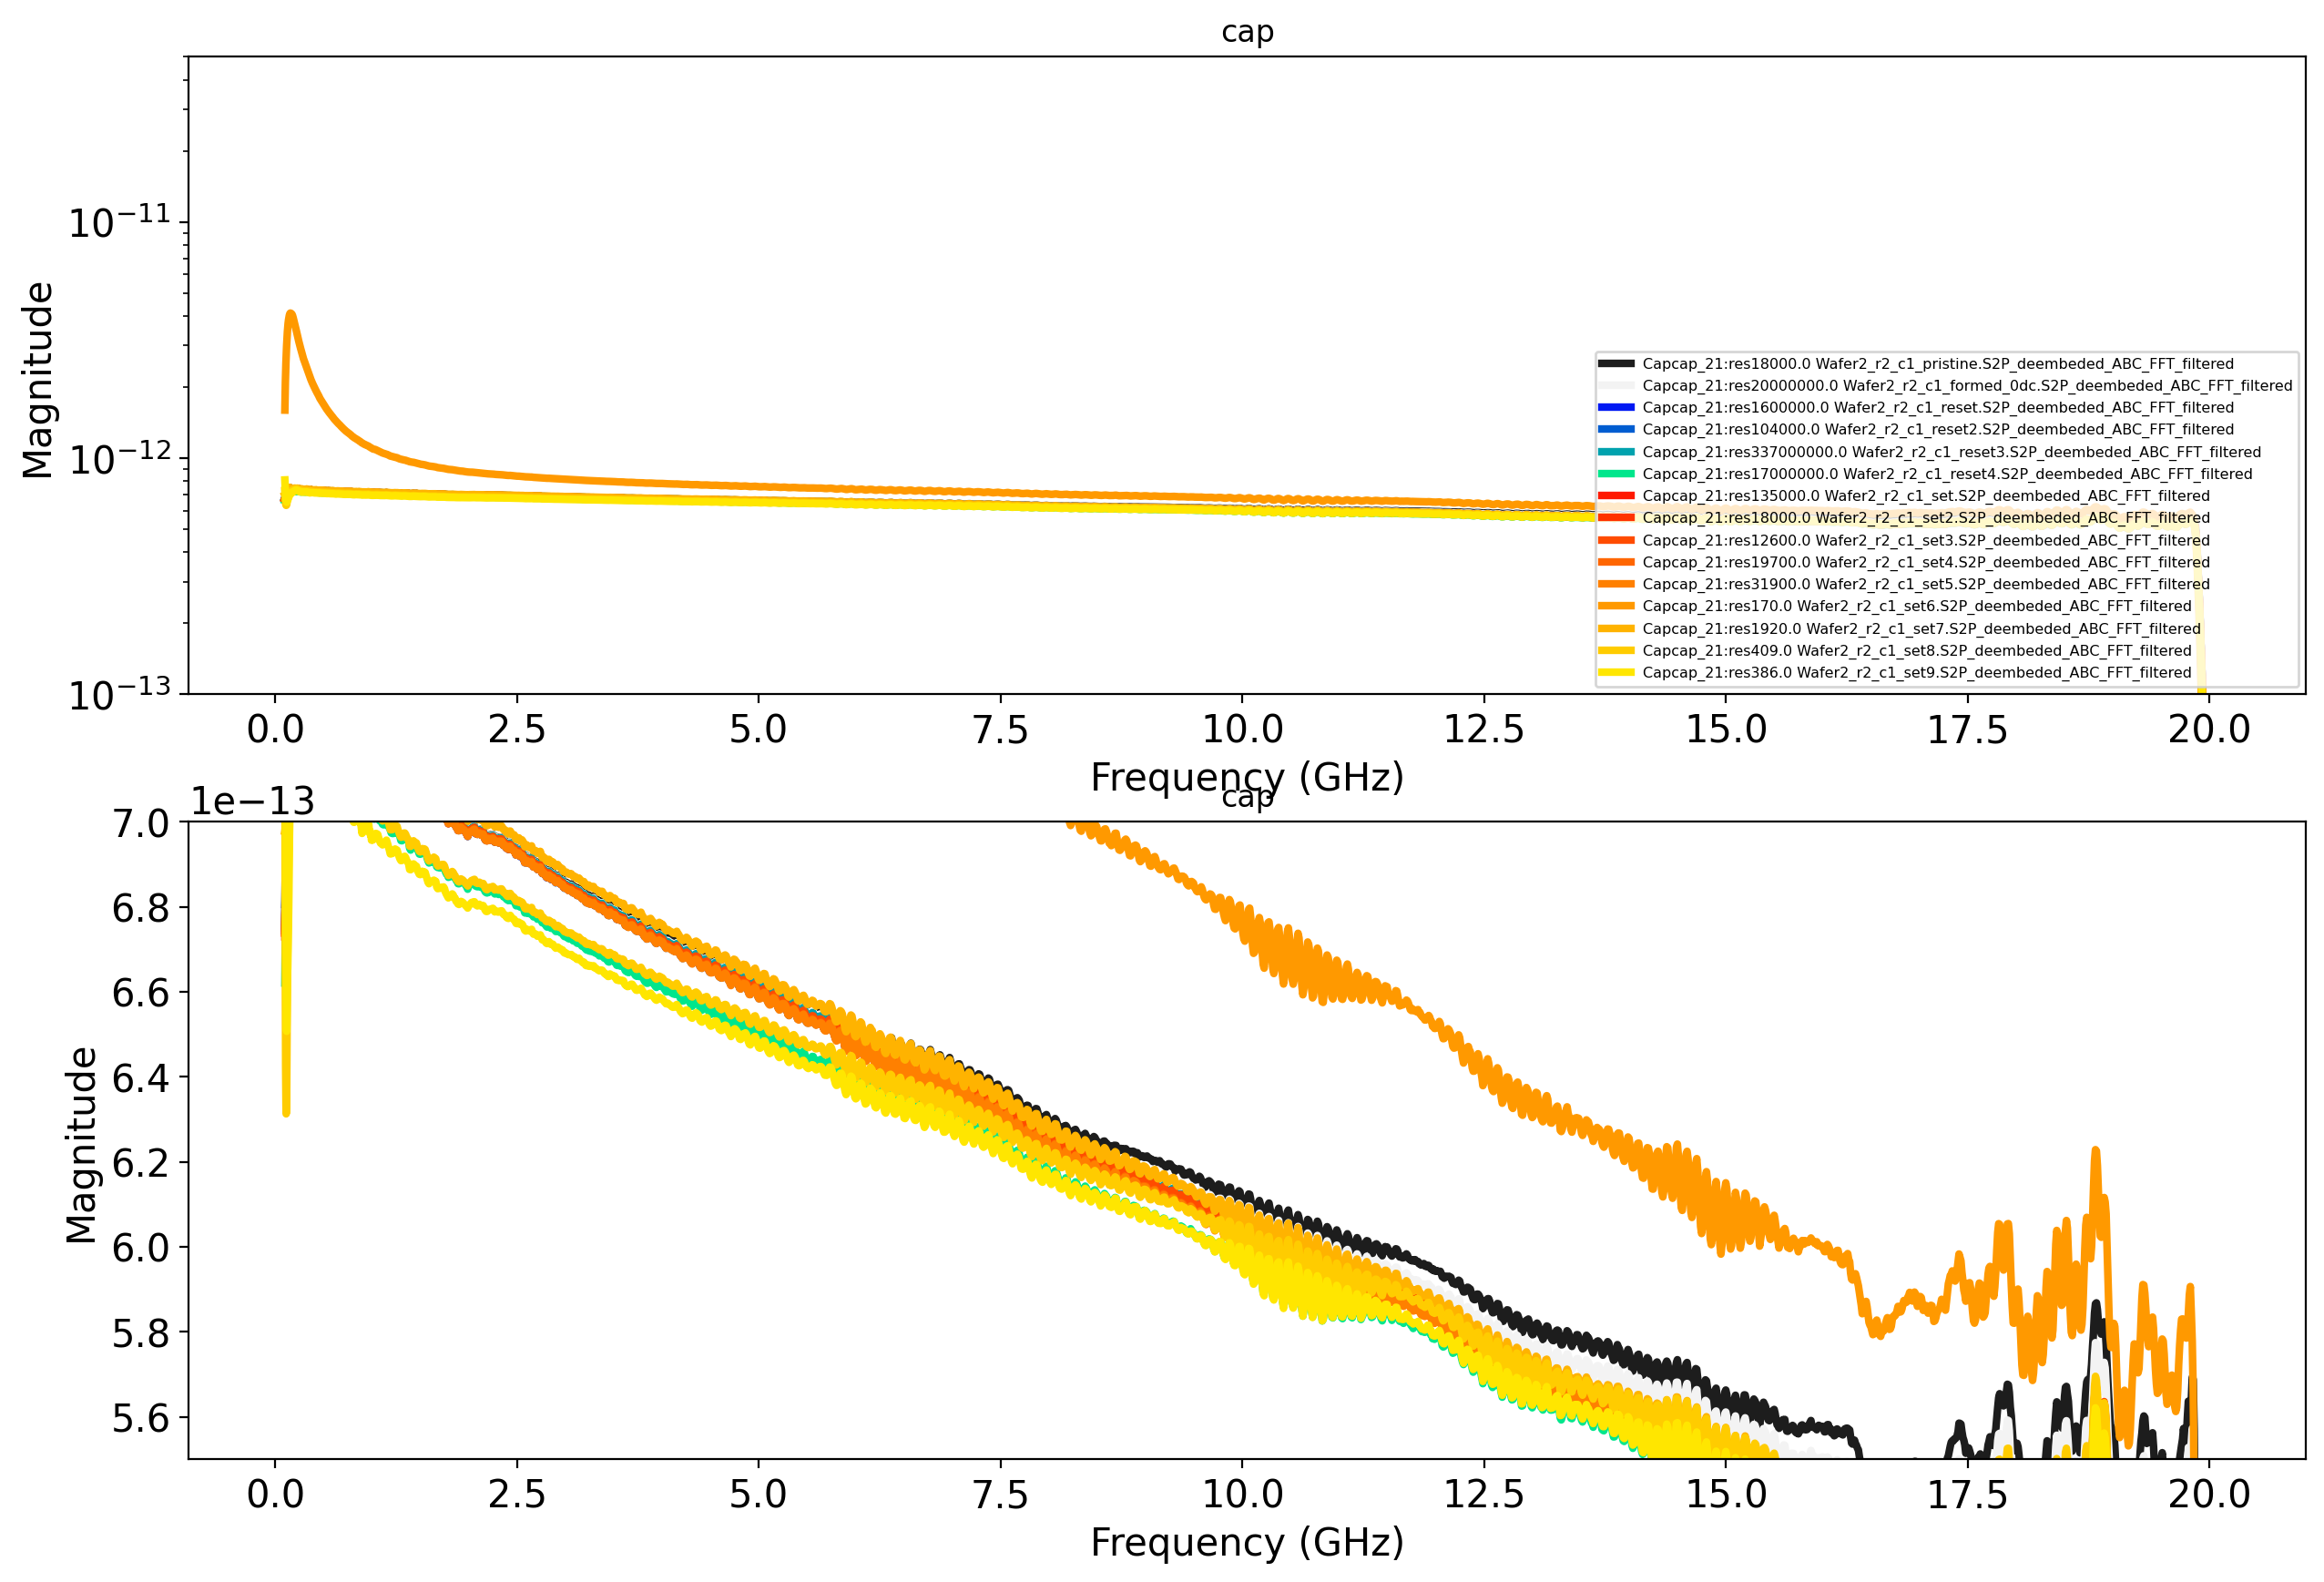

In [6]:
r_num = [[23,42],[56,60,64,67], [57,58,59,61,62,63,65,66,68]]

p_1 = subgen(s2p_files_2_ABCD_FFT, r_num)
p_2 = subgen(sp2_files_2_FFT, r_num)

plot_data_1 = p_1
plot_data_2 = p_2

# res_list_names = [pristine=1.8e4,formed=2e7,reset=1.6e6,set=1.35e5,set2=1.8e4,set3=1.26e4,reset2=1.04e5,set4=1.97e4,set5=3.19e4,set6=1.7e2
#                   reset3=3.37e8,set7=1.92e3,set8=4.09e2,reset4=1.7e7,set9=3.86e2]
res_list = [[1.8e4,2e7],[1.6e6,1.04e5,3.37e8,1.7e7],[1.35e5,1.8e4,1.26e4,1.97e4,3.19e4,1.7e2,1.92e3,4.09e2,3.86e2]]
#res_list = [x * 1e6 for x in [1.8e4,2e7,1.6e6,1.35e5,1.8e4,1.26e4,1.04e5,1.97e4,3.19e4,1.7e2,3.37e8,1.92e3,4.09e2,1.7e7,3.86e2]]

#-------------------Plotting-------------------
plt.rcParams['lines.linewidth'] = 3  # Change this to your desired line width
f = plt.figure(figsize=(15,10),dpi=200)
gs = f.add_gridspec(2, 1)
ax = f.add_subplot(gs[0, 0])
ax1 = f.add_subplot(gs[1, 0])

# 
sub_plot(ax=ax, dev_subset = plot_data_1, plot_type=['cap'], log_x=False, m_port=[2], n_port=[1], deembed_data=False, 
         y_range = [1e-13,5e-11],x_range='0.1-20ghz', R_in = res_list,log_y=True
         )
# 
sub_plot(ax=ax1, dev_subset = plot_data_1, plot_type=['cap'], log_x=False, m_port=[2], n_port=[1], deembed_data=False, 
         y_range=[5.5e-13,7e-13], x_range='0.1-20ghz',p_legend = False, R_in = res_list)

#plt.savefig(os.path.join(path_out, 'capacitance_from_RCsimple_dual22'), format='svg')

plt.show()

### Transform RC paralle Model to generate ABCD/S parameters

In [7]:
# Generate list of data to fit a model to
#r_num = [[23,42],[56,60,64,67], [57,58,59,61,62,63,65,66,68]]
r_num = [[23],[65], [68]]
model_input = subgen(s2p_files_2_ABCD_FFT, r_num)

# Define the starting model parameters
R_p1 = 5e3
C_p1 = 6.3e-13

R_p2 = 1e3
C_p2 = 6e-13
#R_DC = [[1.8e9,2e7],[1.6e6,1.04e5,3.37e8,1.7e7],[1.35e5,1.8e4,1.26e4,1.97e4,3.19e4,1.7e2,1.92e3,4.09e2,3.86e2]]
R_DC = [[1.8e9],[1.92e3],[3.86e2]]

def circuit_model(f, R_p1, R_p2, C_p1, C_p2, R_DC):
    R_s = 9
    R_p1 = R_DC-R_s#-R_p2
    z_sys = R_s+ R_p1/ (1 + 1j * 2 * np.pi * f * C_p1 * R_p1) #+ R_p2 / (1 + 1j * 2 * np.pi * f * C_p2 * R_p2)
    return z_sys

# Define the function to minimize
def minimize_z(x, f, z_meas,R_DC):
    R_p1, R_p2, C_p1, C_p2 = x
    z_sys = circuit_model(f, R_p1, R_p2, C_p1, C_p2, R_DC)
    return np.sum((z_sys.real - z_meas.real)**2 + (z_sys.imag - z_meas.imag)**2)

# Create a deep copy of the model input to prevent overwriting the original data
model_output = copy.deepcopy(model_input)

# Loop through the data and apply the model to model_outuput
for i, sub_set in enumerate(model_output):
    for j, sub_dev in enumerate(sub_set):
        
        # Slice start and end of data because filter gives an infinity! which ruins the optimisation
        slice_range = slice(1000,-1450)#slice(1000,-15)
        #input data parameters
        z_meas = copy.deepcopy(model_input[i][j].network.a[:,0,1])
        z_meas = z_meas[slice_range]
        f_app = sub_dev.network.f[slice_range]
        
        x0 = np.array([R_p1, R_p2, C_p1, C_p2])
        print('Initial Values:', x0)
        bound_range = [(R_DC[i][j]/2, R_DC[i][j]),(1, 1e3),(1e-13, 10e-13),(1e-14, 1e-12)]  # example bounds
        #res = minimize(minimize_z, x0, args=(f_app, z_meas, R_DC[i][j]), method='TNC', bounds=bounds, options={ 'disp': True})
        #res = minimize(minimize_z, x0, args=(f_app, z_meas, R_DC[i][j]), method='L-BFGS-B', bounds=bounds, options={'disp': True})
        res = minimize(minimize_z, x0, args=(f_app, z_meas,R_DC[i][j]), method='nelder-mead', options={'maxiter': 10000,'xatol': 1e-10, 'disp': True}, bounds=bound_range)
       
        print("Best fit values:")
        print("R_p1 =", res.x[0])
        print("R_p2 =", res.x[1])
        print("C_p1 =", res.x[2])
        print("C_p2 =", res.x[3])
        print("R_s =", R_DC[i][j]-res.x[0]-res.x[1])
        #Calculate the model with best fit
        
        z_sys_init = circuit_model(f_app, R_p1, R_p2, C_p1, C_p2, R_DC[i][j])
        z_sys_after = circuit_model(f_app, res.x[0], res.x[1], res.x[2], res.x[3], R_DC[i][j])
        print("Initial Error:","{:.3e}".format(np.sum((z_sys_init.real - z_meas.real)**2 + (z_sys_init.imag - z_meas.imag)**2)))
        print("Best Error:","{:.3e}".format(np.sum((z_sys_after.real - z_meas.real)**2 + (z_sys_after.imag - z_meas.imag)**2)))
      
        # Generate full z values from full f range
        f_full = sub_dev.network.f
        z_sys_opt = circuit_model(f_full, res.x[0], res.x[1], res.x[2], res.x[3], R_DC[i][j])
        
        
        #z_sys_opt =circuit_model(f_full, R_p1, R_p2, C_p1, C_p2, R_DC[i][j])
        # Create ABCD matrix of the same length as f_app with initial values of [1, 0, 0, 1]
        abcd_m = np.ones((len(f_full), 2, 2), dtype=complex)
        abcd_m[:, 1, 0] = 0
        abcd_m[:, 0, 1] = z_sys_opt

        # Create network object from ABCD matrix
        model_network = rf.Network(frequency = f_full, a=abcd_m, z0 = sub_dev.network.z0)
        sub_dev.network = model_network
   
    
    

Initial Values: [5.0e+03 1.0e+03 6.3e-13 6.0e-13]


/var/folders/xr/wc8tnsks36n8ywxxvqplwqch0000gn/T/ipykernel_77861/3095119003.py:46: OptimizeWarning: Initial guess is not within the specified bounds
  res = minimize(minimize_z, x0, args=(f_app, z_meas,R_DC[i][j]), method='nelder-mead', options={'maxiter': 10000,'xatol': 1e-10, 'disp': True}, bounds=bound_range)


Best fit values:
R_p1 = 925571431.593592
R_p2 = 973.2500835290369
C_p1 = 7.284317792602225e-13
C_p2 = 5.489489218196375e-13
R_s = 874427595.1563244
Initial Error: 3.525e+06
Best Error: 1.135e+05
Initial Values: [5.0e+03 1.0e+03 6.3e-13 6.0e-13]
Optimization terminated successfully.
         Current function value: 134608.368228
         Iterations: 165
         Function evaluations: 377
Best fit values:
R_p1 = 1882.4369403337384
R_p2 = 978.8048847312273
C_p1 = 7.306772411100443e-13
C_p2 = 5.567944822987223e-13
R_s = -941.2418250649657
Initial Error: 3.207e+06
Best Error: 1.346e+05
Initial Values: [5.0e+03 1.0e+03 6.3e-13 6.0e-13]
Optimization terminated successfully.
         Current function value: 56793.459008
         Iterations: 168
         Function evaluations: 378
Best fit values:
R_p1 = 382.57407481844797
R_p2 = 987.427140183861
C_p1 = 7.019687264070443e-13
C_p2 = 5.729074656813497e-13
R_s = -984.001215002309
Initial Error: 3.806e+05
Best Error: 5.679e+04


/var/folders/xr/wc8tnsks36n8ywxxvqplwqch0000gn/T/ipykernel_77861/3095119003.py:46: RuntimeWarning: Maximum number of iterations has been exceeded.
  res = minimize(minimize_z, x0, args=(f_app, z_meas,R_DC[i][j]), method='nelder-mead', options={'maxiter': 10000,'xatol': 1e-10, 'disp': True}, bounds=bound_range)


3698


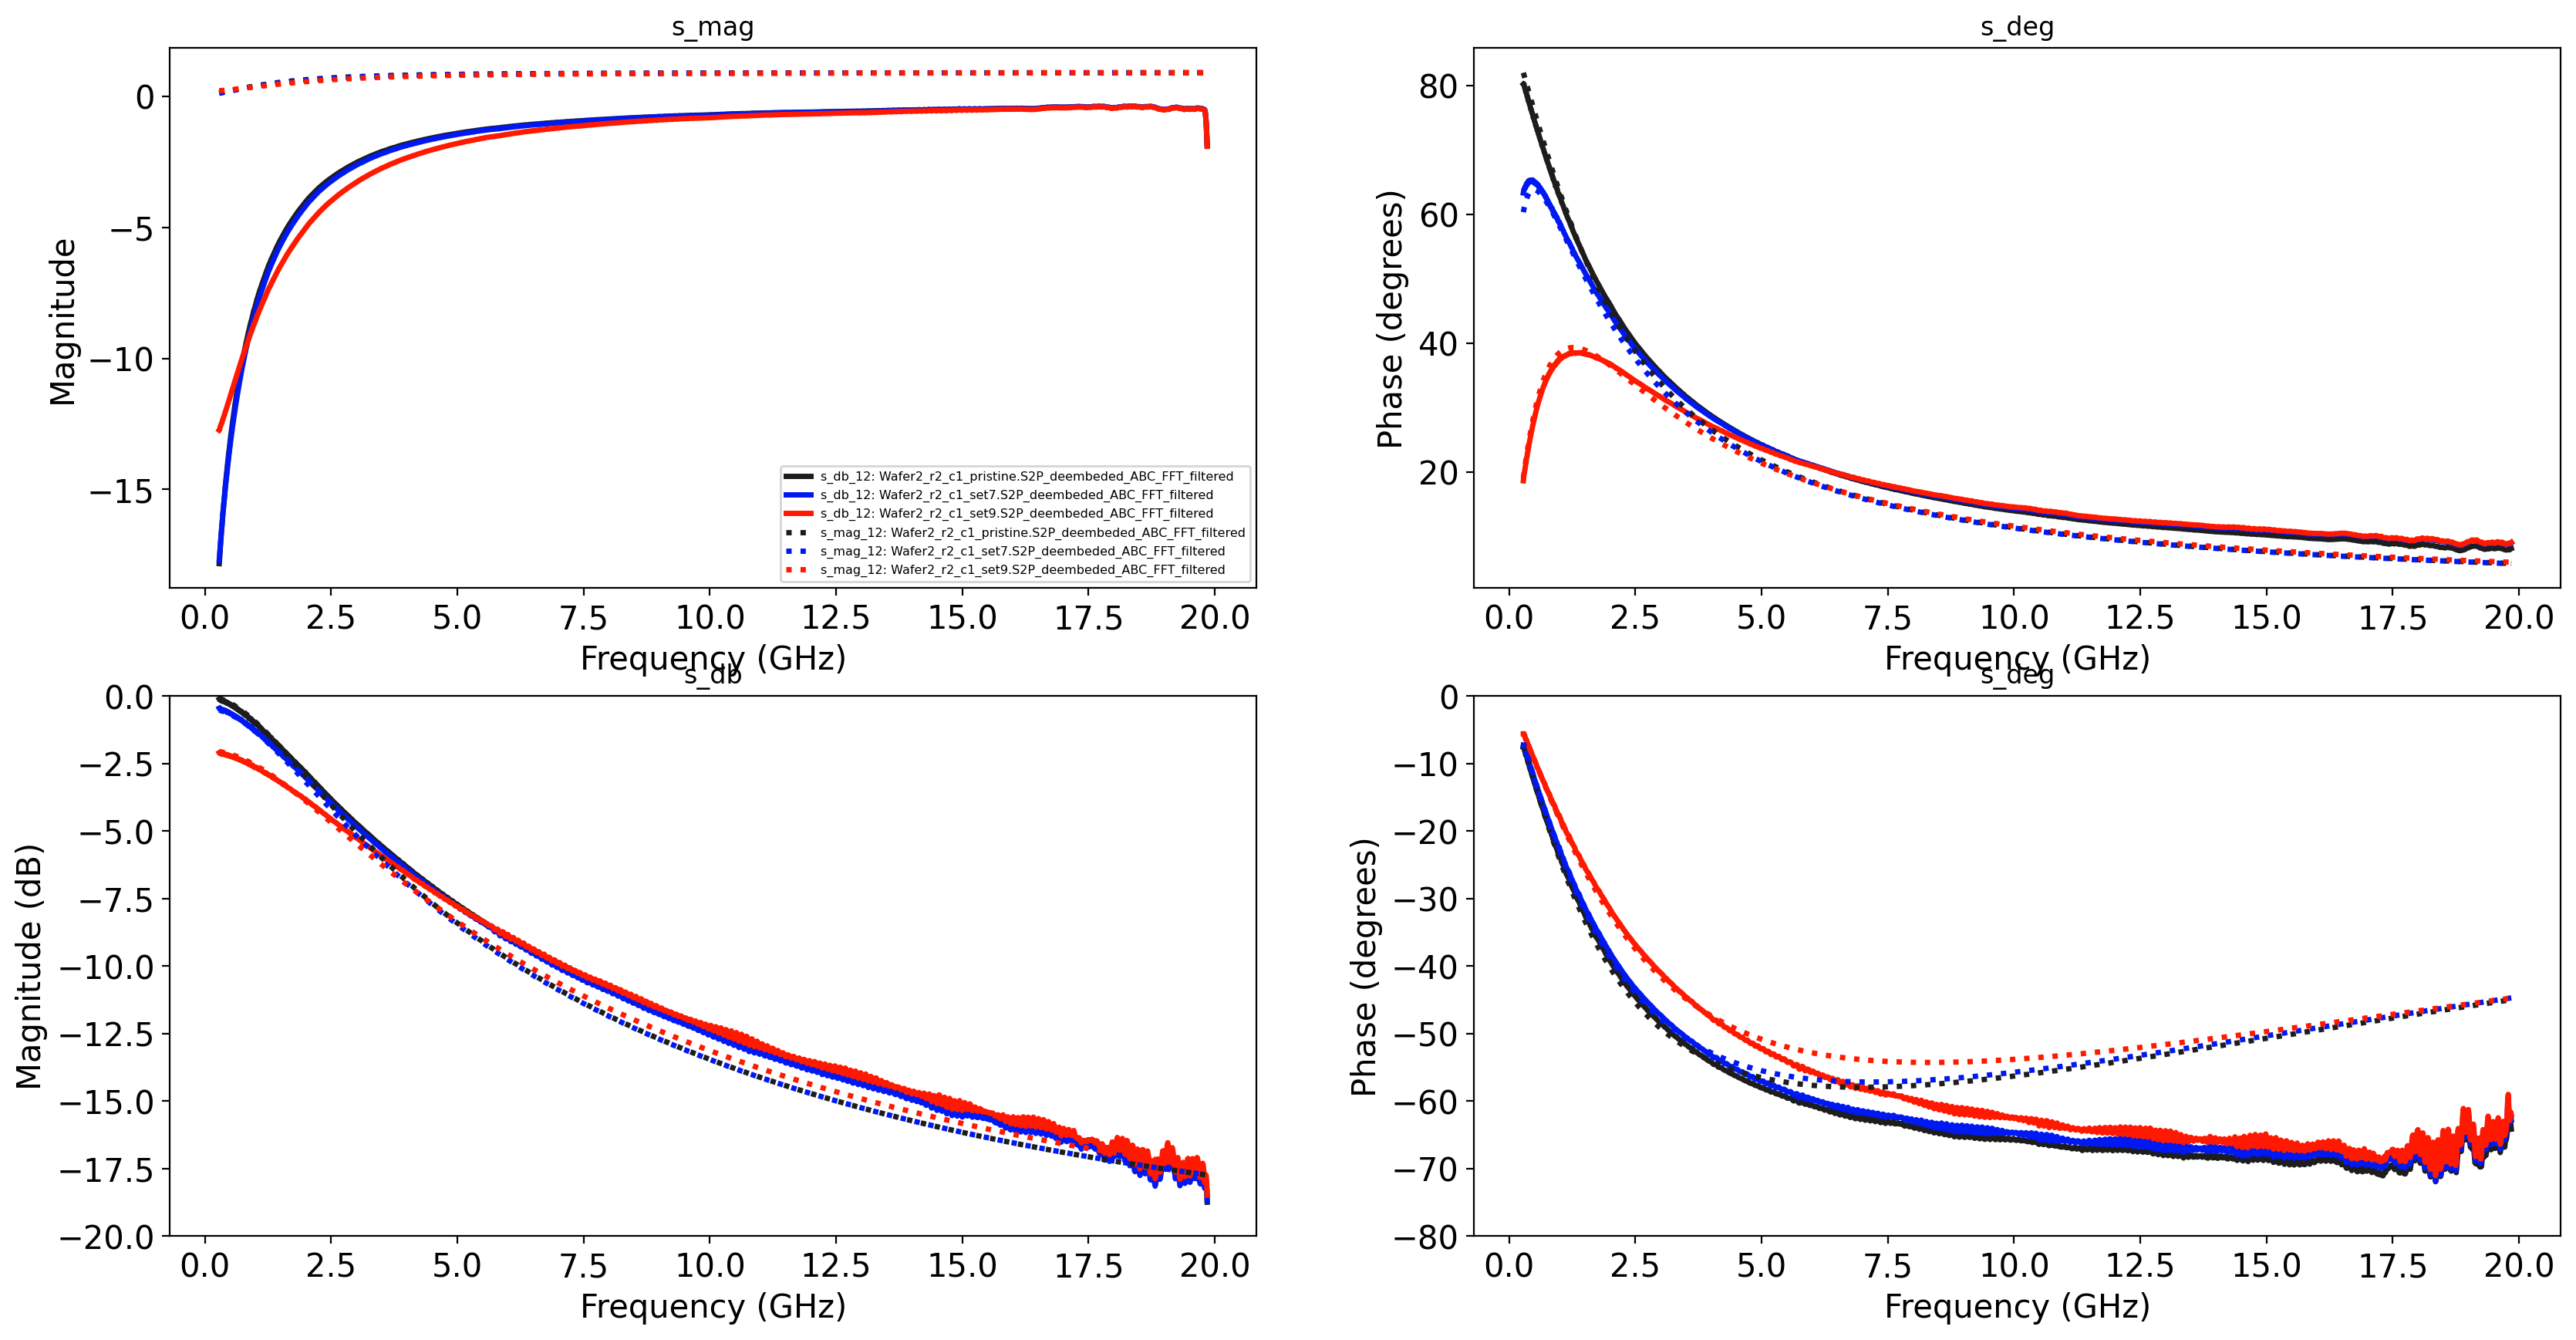

In [18]:
#-------------------Plotting-------------------
plt.rcParams['lines.linewidth'] = 2.5  # Change this to your desired line width
f = plt.figure(figsize=(20,10),dpi=200)
gs = f.add_gridspec(2, 2)
ax = f.add_subplot(gs[0, 0])
ax1 = f.add_subplot(gs[0, 1])
ax2 = f.add_subplot(gs[1, 0])
ax3 = f.add_subplot(gs[1, 1])

print(len(model_input[0][0].network.f))

x_range_var =  slice(1000,-15)
# Measured data with solid line
sub_plot(ax=ax, dev_subset=model_input, plot_type=['s_db'], log_x=False, m_port=[1], n_port=[2], deembed_data=False,
         x_range= x_range_var)
sub_plot(ax=ax1, dev_subset=model_input, plot_type=['s_deg'], log_x=False, m_port=[1], n_port=[2], deembed_data=False, 
          x_range= x_range_var,p_legend=False)
sub_plot(ax=ax2, dev_subset=model_input, plot_type=['s_db'], log_x=False, m_port=[1], n_port=[1], deembed_data=False, 
         y_range = [-60,0],x_range= x_range_var,p_legend=False)
sub_plot(ax=ax3, dev_subset=model_input, plot_type=['s_deg'], log_x=False, m_port=[1], n_port=[1], deembed_data=False, 
         y_range=[-80,0], x_range= x_range_var,p_legend=False)

# Modelled data with dotted line
sub_plot(ax=ax, dev_subset=model_output, plot_type=['s_db'], log_x=False, m_port=[1], n_port=[2], deembed_data=False, 
         x_range= x_range_var , dot_line=True)
sub_plot(ax=ax1, dev_subset=model_output, plot_type=['s_deg'], log_x=False, m_port=[1], n_port=[2], deembed_data=False, 
          x_range= x_range_var,p_legend=False, dot_line=True)
sub_plot(ax=ax2, dev_subset=model_output, plot_type=['s_db'], log_x=False, m_port=[1], n_port=[1], deembed_data=False, 
         y_range = [-20,0],x_range= x_range_var,p_legend=False, dot_line=True)
sub_plot(ax=ax3, dev_subset=model_output, plot_type=['s_deg'], log_x=False, m_port=[1], n_port=[1], deembed_data=False, 
         y_range=[-80,0], x_range= x_range_var,p_legend=False, dot_line=True)

#plt.savefig(os.path.join(path_out, 'circfit_memstate_s_db11.svg'), format='svg')

### Diode Circuit Model

In [9]:
# Generate list of data to fit a model to
#r_num = [[23,42],[56,60,64,67], [57,58,59,61,62,63,65,66,68]]
r_num = [[23],[65], [68]]
model_input_diode = subgen(s2p_files_2_ABCD_FFT, r_num)


#R_DC = [[1.8e9,2e7],[1.6e6,1.04e5,3.37e8,1.7e7],[1.35e5,1.8e4,1.26e4,1.97e4,3.19e4,1.7e2,1.92e3,4.09e2,3.86e2]]
R_DC = [[1.8e9],[1.92e3],[3.86e2]]

def circuit_model(f, R_p1, C_p1, R_w, tau_w, R_DC):

    R_s = 5
    z_pn = 1/(1j * 2 * np.pi * f * tau_w)#R_w*np.tanh(np.sqrt(1j*2*np.pi*f*tau_w))/np.sqrt(1j*2*np.pi*f*tau_w)
    z_rc =  R_s+ R_p1/(1 + (1j * 2 * np.pi * f * C_p1 * R_p1)) #+ R_p2 / (1 + 1j * 2 * np.pi * f * C_p2 * R_p2)
    z_sys =1/ (1/z_rc + 1/z_pn)
    return z_sys

# Define the function to minimize
def minimize_z(x, f, z_meas,R_DC):
    R_p1, C_p1, R_w, tau_w = x
    z_sys = circuit_model(f, R_p1, C_p1, R_w, tau_w, R_DC)
    #now normalising to prevent a bias towards lower frequencies where impedance is higher
    return np.sum(((z_sys.real - z_meas.real)/z_sys.real)**2 + ((z_sys.imag - z_meas.imag)/z_sys.imag)**2)

# Create a deep copy of the model input to prevent overwriting the original data
model_output_diode = copy.deepcopy(model_input_diode)

# Loop through the data and apply the model to model_outuput
for i, sub_set in enumerate(model_output_diode):
    for j, sub_dev in enumerate(sub_set):
        
        # Define the starting model parameters
        R_p1 = R_DC[i][j]
        C_p1 = 6.3e-13
        R_w = 1e1
        tau_w = 1e-9
        
        # Slice start and end of data because filter gives an infinity! which ruins the optimisation
        slice_range = slice(1000,-1450)#slice(1000,-15)
        #input data parameters
        z_meas = copy.deepcopy(model_input_diode[i][j].network.a[:,0,1])
        z_meas = z_meas[slice_range]
        f_app = sub_dev.network.f[slice_range]
        
        x0 = np.array([R_p1, C_p1, R_w, tau_w])
        print('Initial Values:', x0)
        bound_range = [(R_DC[i][j]*0.8, R_DC[i][j]),(1e-13, 11e-13),(0.1,1e6),(1e-15, 1e-7)]  # bounds
        #res = minimize(minimize_z, x0, args=(f_app, z_meas, R_DC[i][j]), method='TNC', bounds=bounds, options={ 'disp': True})
        #res = minimize(minimize_z, x0, args=(f_app, z_meas, R_DC[i][j]), method='L-BFGS-B', bounds=bounds, options={'disp': True})
        res = minimize(minimize_z, x0, args=(f_app, z_meas,R_DC[i][j]), method='nelder-mead', options={'maxiter': 10000,'xatol': 1e-10, 'disp': True}, bounds=bound_range)
       
        print("R_DC =", R_DC[i][j])
        print("Best fit values:")
        R_p1_opt, C_p1_opt, R_w_opt, tau_w_opt = res.x
        print("R_p1 =", R_p1_opt)
        print("C_p1 =", C_p1_opt)
        print("R_w =", R_w_opt)
        print("tau_w =", tau_w_opt)
        
        # Compare the error before and after optimisation
        z_sys_init = circuit_model(f_app, R_p1, C_p1, R_w, tau_w, R_DC[i][j])
        z_sys_after = circuit_model(f_app, res.x[0], res.x[1], res.x[2],res.x[3], R_DC[i][j])
        print("Initial Error:","{:.3e}".format(np.sum((z_sys_init.real - z_meas.real)**2 + (z_sys_init.imag - z_meas.imag)**2)))
        print("Best Error:","{:.3e}".format(np.sum((z_sys_after.real - z_meas.real)**2 + (z_sys_after.imag - z_meas.imag)**2)))
      
        # Generate full z values from full f range
        f_full = sub_dev.network.f
        z_sys_opt = circuit_model(f_full, res.x[0], res.x[1], res.x[2], res.x[3], R_DC[i][j])
        print('minfreq',min(f_full))
        print('maxfreq',max(f_full))
        
        #z_sys_opt =circuit_model(f_full, R_p1, R_p2, C_p1, C_p2, R_DC[i][j])
        # Create ABCD matrix of the same length as f_app with initial values of [1, 0, 0, 1]
        abcd_m = np.ones((len(f_full), 2, 2), dtype=complex)
        abcd_m[:, 1, 0] = 0
        abcd_m[:, 0, 1] = z_sys_opt

        # Create network object from ABCD matrix
        model_network = rf.Network(frequency = f_full, a=abcd_m, z0 = sub_dev.network.z0)
        sub_dev.network = model_network


Initial Values: [1.8e+09 6.3e-13 1.0e+01 1.0e-09]
Optimization terminated successfully.
         Current function value: 7360.469764
         Iterations: 273
         Function evaluations: 574
R_DC = 1800000000.0
Best fit values:
R_p1 = 1440000000.0
C_p1 = 7.229145316867425e-13
R_w = 1.5481268504638348
tau_w = 1e-15
Initial Error: 1.399e+08
Best Error: 2.052e+05
minfreq 9000.0
maxfreq 20000000000.0
Initial Values: [1.92e+03 6.30e-13 1.00e+01 1.00e-09]
Optimization terminated successfully.
         Current function value: 58.620302
         Iterations: 175
         Function evaluations: 386
R_DC = 1920.0
Best fit values:
R_p1 = 1725.0205316807983
C_p1 = 7.065306469428592e-13
R_w = 11.41169198479206
tau_w = 1e-15
Initial Error: 1.328e+08
Best Error: 4.677e+05
minfreq 9000.0
maxfreq 20000000000.0
Initial Values: [3.86e+02 6.30e-13 1.00e+01 1.00e-09]
Optimization terminated successfully.
         Current function value: 42.796408
         Iterations: 148
         Function evaluations: 321


3698


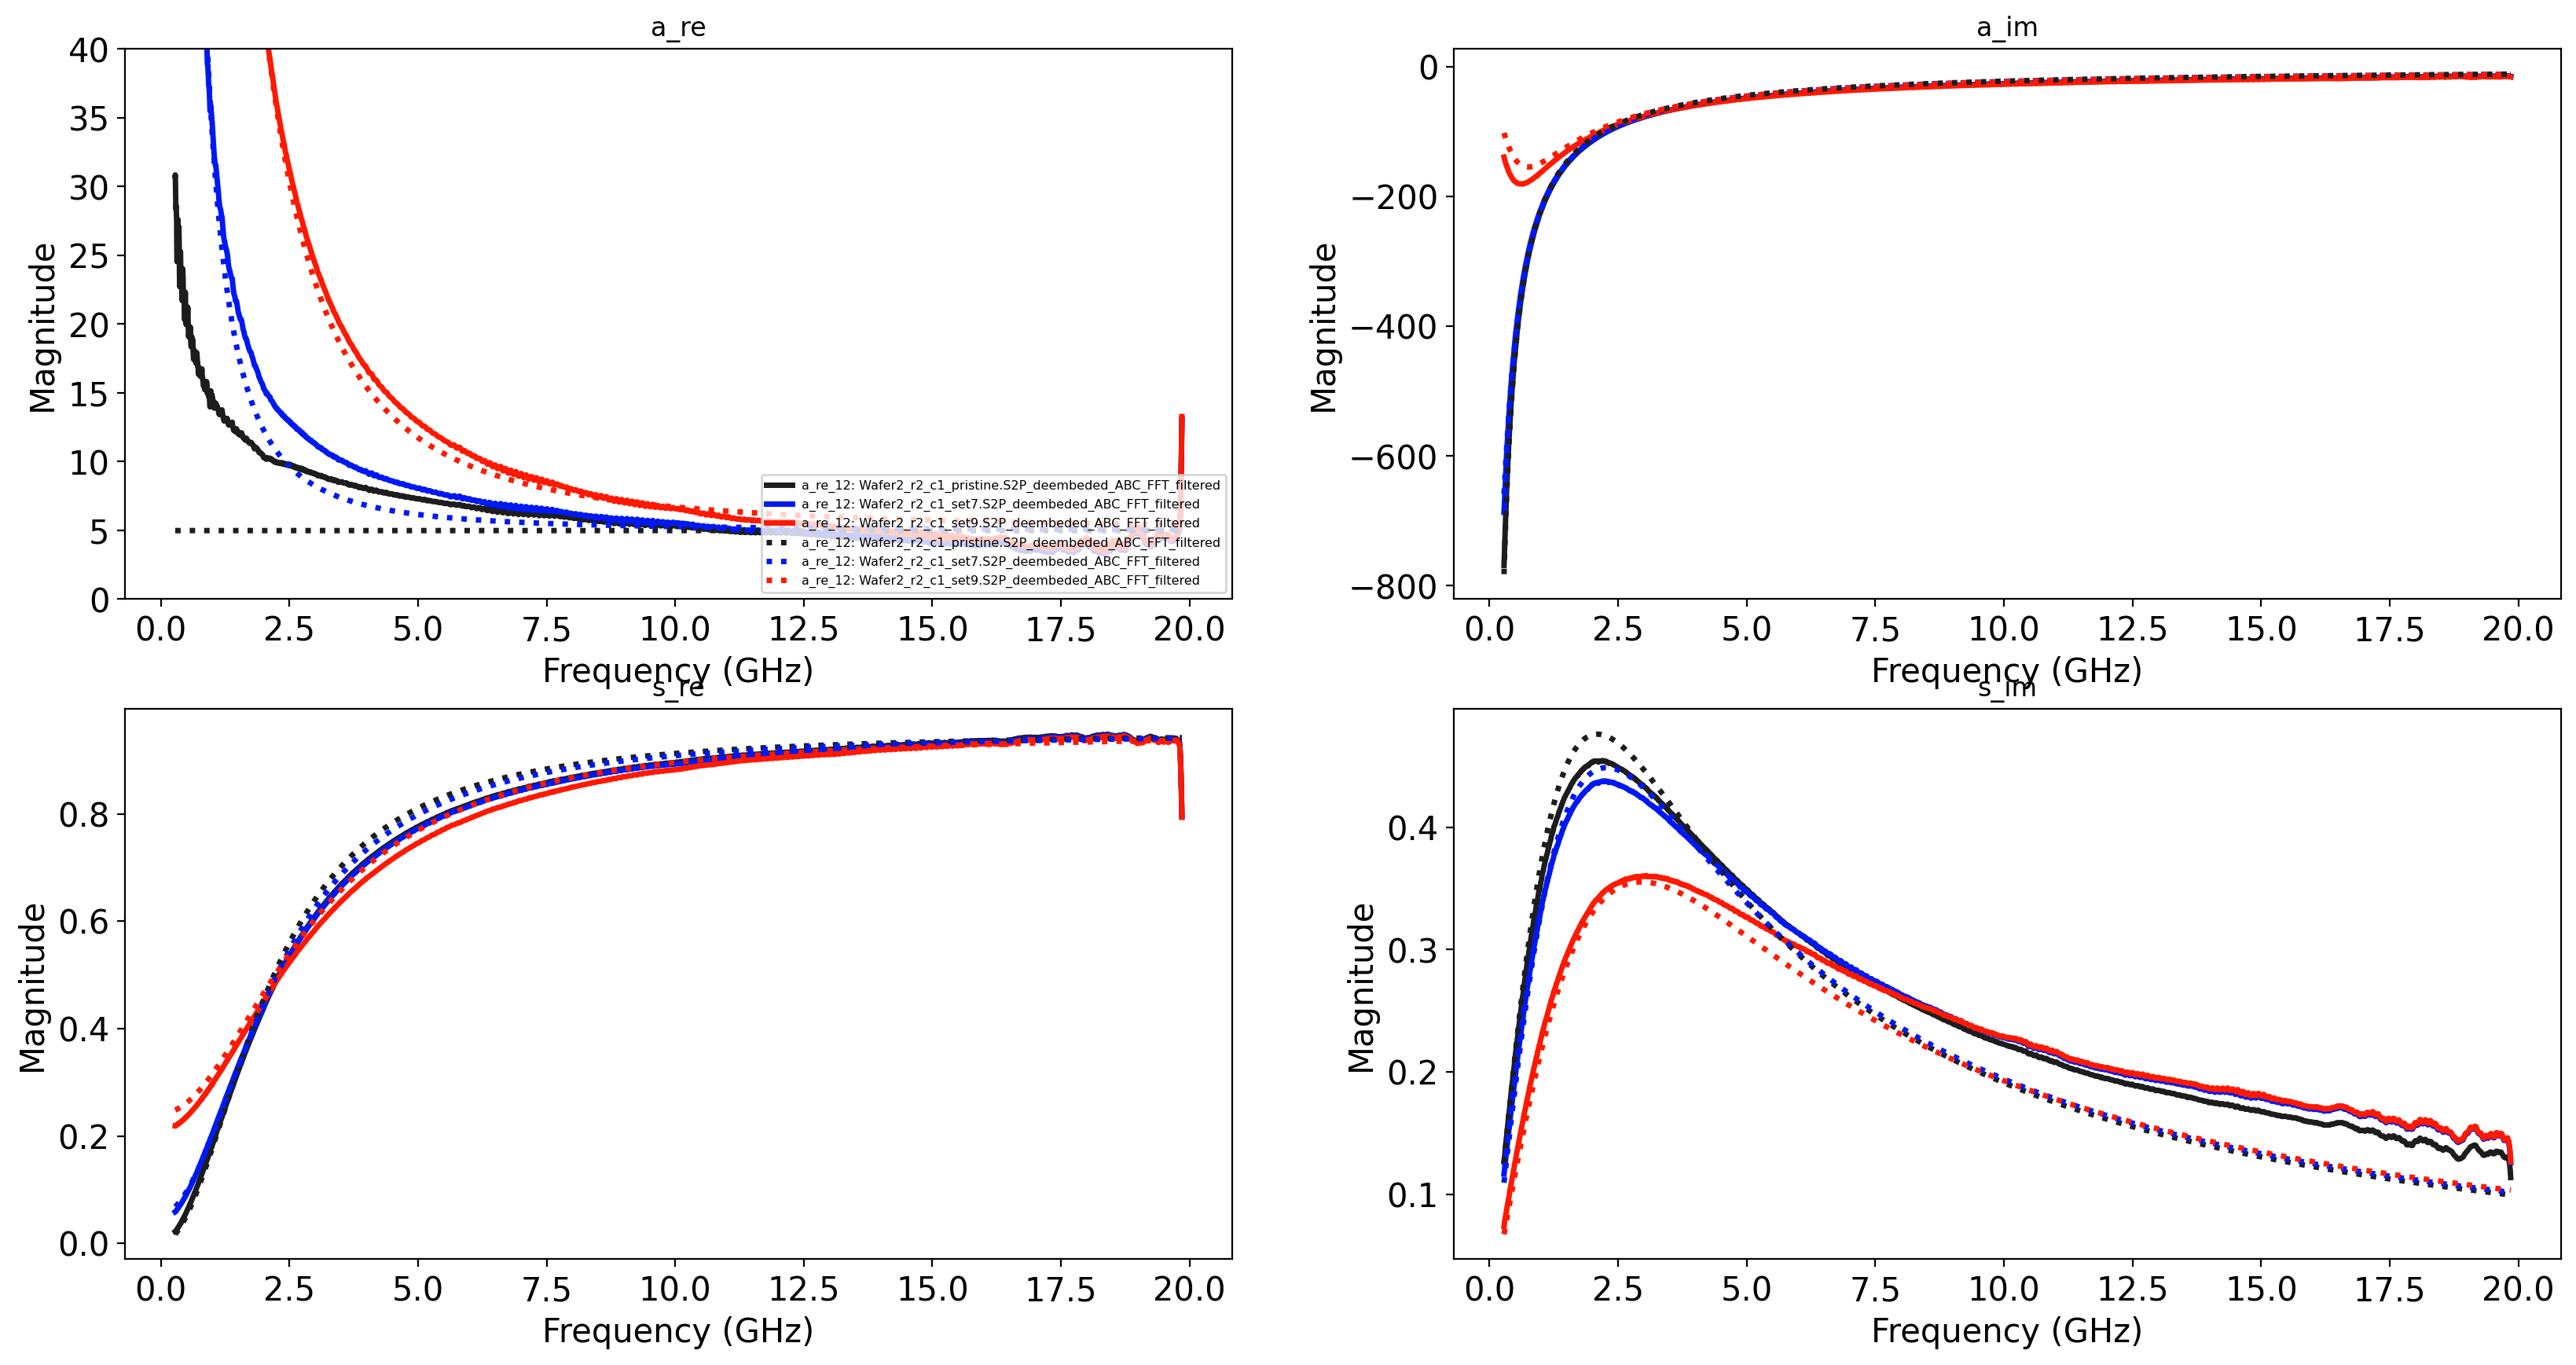

In [10]:
#-------------------Plotting-------------------
plt.rcParams['lines.linewidth'] = 2.5  # Change this to your desired line width
f = plt.figure(figsize=(20,10),dpi=200)
gs = f.add_gridspec(2, 2)
ax = f.add_subplot(gs[0, 0])
ax1 = f.add_subplot(gs[0, 1])
ax2 = f.add_subplot(gs[1, 0])
ax3 = f.add_subplot(gs[1, 1])

print(len(model_input[0][0].network.f))

x_range_var =  slice(1000,-15)
# Measured data with solid line
sub_plot(ax=ax, dev_subset=model_input_diode, plot_type=['a_re'], log_x=False, m_port=[1], n_port=[2], deembed_data=False,
         x_range= x_range_var)
sub_plot(ax=ax1, dev_subset=model_input_diode, plot_type=['a_im'], log_x=False, m_port=[1], n_port=[2], deembed_data=False, 
          x_range= x_range_var,p_legend=False)
sub_plot(ax=ax2, dev_subset=model_input_diode, plot_type=['s_re'], log_x=False, m_port=[1], n_port=[2], deembed_data=False, 
         x_range= x_range_var,p_legend=False)
sub_plot(ax=ax3, dev_subset=model_input_diode, plot_type=['s_im'], log_x=False, m_port=[1], n_port=[2], deembed_data=False, 
          x_range= x_range_var,p_legend=False)

# Modelled data with dotted line
sub_plot(ax=ax, dev_subset=model_output_diode, plot_type=['a_re'], log_x=False, m_port=[1], n_port=[2], deembed_data=False, 
         y_range = [0,40],x_range= x_range_var , dot_line=True)
sub_plot(ax=ax1, dev_subset=model_output_diode, plot_type=['a_im'], log_x=False, m_port=[1], n_port=[2], deembed_data=False, 
          x_range= x_range_var,p_legend=False, dot_line=True)
sub_plot(ax=ax2, dev_subset=model_output_diode, plot_type=['s_re'], log_x=False, m_port=[1], n_port=[2], deembed_data=False, 
         x_range= x_range_var,p_legend=False, dot_line=True)
sub_plot(ax=ax3, dev_subset=model_output_diode, plot_type=['s_im'], log_x=False, m_port=[1], n_port=[2], deembed_data=False, 
          x_range= x_range_var,p_legend=False, dot_line=True)

#plt.savefig(os.path.join(path_out, 'circfit_memstate_s_db11.svg'), format='svg')

### Transform Measured Data to Circuit Model
- Use DC measured R to generate arrays of Capacitance vs Frequency for each dataset
- Use approx Cap value to generate R vs freq for low frequencies
    - Thus showing R and C variation in switching 